<a href="https://colab.research.google.com/github/timrocar/DS-Unit-2-Linear-Models/blob/master/module2-regression-2/LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [13]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [14]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv',
                 parse_dates=['created'],
                 index_col='created')


# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [15]:
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df.info

<bound method DataFrame.info of                      bathrooms  ...  common_outdoor_space
created                         ...                      
2016-06-24 07:54:24        1.5  ...                     0
2016-06-12 12:19:27        1.0  ...                     0
2016-04-17 03:26:41        1.0  ...                     0
2016-04-18 02:22:02        1.0  ...                     0
2016-04-28 01:32:41        1.0  ...                     0
...                        ...  ...                   ...
2016-06-02 05:41:05        1.0  ...                     0
2016-04-04 18:22:34        1.0  ...                     1
2016-04-16 02:13:40        1.0  ...                     0
2016-04-08 02:13:33        1.0  ...                     0
2016-04-12 02:48:07        1.0  ...                     0

[48817 rows x 33 columns]>

In [17]:
df.isnull().any()

bathrooms               False
bedrooms                False
description              True
display_address          True
latitude                False
longitude               False
price                   False
street_address           True
interest_level          False
elevator                False
cats_allowed            False
hardwood_floors         False
dogs_allowed            False
doorman                 False
dishwasher              False
no_fee                  False
laundry_in_building     False
fitness_center          False
pre-war                 False
laundry_in_unit         False
roof_deck               False
outdoor_space           False
dining_room             False
high_speed_internet     False
balcony                 False
swimming_pool           False
new_construction        False
terrace                 False
exclusive               False
loft                    False
garden_patio            False
wheelchair_access       False
common_outdoor_space    False
dtype: boo

- [ ] Engineer at least two new features. (See below for explanation & ideas.)

In [18]:
#feature 1
feature1 = df[df.columns[9:36]]
df['sum_of_features'] = feature1.sum(axis=1)
df['sum_of_features']

created
2016-06-24 07:54:24    0
2016-06-12 12:19:27    5
2016-04-17 03:26:41    3
2016-04-18 02:22:02    2
2016-04-28 01:32:41    1
                      ..
2016-06-02 05:41:05    5
2016-04-04 18:22:34    9
2016-04-16 02:13:40    5
2016-04-08 02:13:33    5
2016-04-12 02:48:07    1
Name: sum_of_features, Length: 48817, dtype: int64

In [19]:
#feature 2 
feature2 = df[['bathrooms','bedrooms']]
df['total_rooms'] = feature2.sum(axis=1)
df['total_rooms']


created
2016-06-24 07:54:24    4.5
2016-06-12 12:19:27    3.0
2016-04-17 03:26:41    2.0
2016-04-18 02:22:02    2.0
2016-04-28 01:32:41    5.0
                      ... 
2016-06-02 05:41:05    3.0
2016-04-04 18:22:34    2.0
2016-04-16 02:13:40    2.0
2016-04-08 02:13:33    1.0
2016-04-12 02:48:07    3.0
Name: total_rooms, Length: 48817, dtype: float64

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.

In [20]:
df.sort_index()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,sum_of_features,total_rooms
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-01 22:12:41,1.0,1,X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...,Astor Place,40.7302,-73.9924,3195,1 Astor Place,high,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.0
2016-04-01 22:56:00,1.0,0,"This Enormous Studio Features: Harwood Floors,...",East 54th Street,40.7576,-73.9677,2000,230 East 54th Street,medium,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1.0
2016-04-01 22:57:15,2.0,3,--- East 31st St & Lexington Avenue --- This S...,East 31st St & Lexington Avenue,40.7388,-73.9851,5850,105 Lexington Avenue,high,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,9,5.0
2016-04-01 23:26:07,1.0,1,Reduced Fee!! Priced To Rent!\rLarge Newly Upd...,West End Ave,40.7939,-73.9738,2745,700 West End Ave,medium,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,8,2.0
2016-04-02 00:48:13,1.0,1,Phenomenal deal of the century!! This spacious...,E 88th street,40.7784,-73.9491,2400,401 E 88th street,medium,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-29 17:47:34,1.0,2,"Newly renovated, clean, quiet & very bright 2...",At Thompson St,40.7261,-74.0014,3045,132 Thompson St #20,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0
2016-06-29 17:56:12,1.0,1,Historic conversion in Greenpoint with awesome...,"100 Dupont St, Brooklyn, NY 11222",40.7358,-73.9560,2648,100 Dupont St,low,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,2.0
2016-06-29 18:14:48,1.0,1,"Large, sunny one bedroom apartment with a sepa...",West 45th St. and 8th Ave.,40.7597,-73.9890,2650,305 West 45th St.,low,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2.0


In [21]:
#splitting data 

# Target 

y = df['price']

# Feature Matrix

X = df[['sum_of_features', 'total_rooms']]

In [22]:
#train/split
cutoff = '2016-06-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
x_val, y_val = X.loc[~mask], y.loc[~mask]

In [30]:
#establishing baselines

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#define a function for y.train.mean (baseline predictor)
def baseline_predict(X=None):
  return y_train.mean()

baseline_guess = y_train.mean()

## MAE = abs(y_train - baseline_guess).mean()
baseline_mae = mean_absolute_error(y_train, [y_train.mean()]*len(y_train))

baseline_rmse = mean_squared_error(y_train, [y_train.mean()]*len(y_train), squared=False)


print(baseline_guess)
print(baseline_mae)
print(baseline_rmse)

3575.604007034292
1201.8811133682555
1762.1090255404863


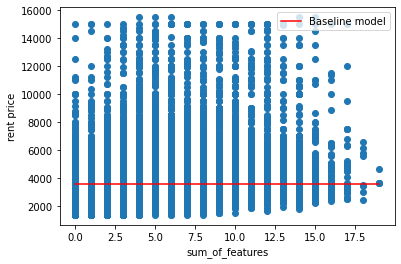

In [35]:
import matplotlib.pyplot as plt
col = 'sum_of_features'
x_min, x_max = X_train[col].min(), X_train[col].max()
x_coords = np.linspace(x_min, x_max, 50)
y_predbl = [baseline_predict(x) for x in x_coords]
plt.plot(x_coords, y_predbl, color='red', label='Baseline model')

plt.scatter(X_train[col], y_train)
plt.xlabel('sum_of_features')
plt.ylabel('rent price')
plt.legend()
plt.show();

##Building my Model

In [36]:
from sklearn.linear_model import LinearRegression
# defining the predictor
regressor = LinearRegression()

# training predictor 
regressor.fit(X_train, y_train);

print('Coefficients are:',regressor.coef_)
print('Intercept is:', regressor.intercept_)


Coefficients are: [101.76435155 767.95662272]
Intercept is: 998.1946341143803


In [37]:
y_pred = regressor.predict(X_train)

model_mae = mean_absolute_error(y_train, y_pred)
model_rmse = mean_squared_error(y_train, y_pred, squared=False)
model_r2 = r2_score(y_train, y_pred)

print('Model MAE (training data):', model_mae)
print('Model RMSE (training data):', model_rmse)
print('Model R^2 (training data):', model_r2)

Model MAE (training data): 856.6168448694106
Model RMSE (training data): 1295.7149658677172
Model R^2 (training data): 0.45930369872329946


In [38]:
y_pred = regressor.predict(x_val)

model_mae = mean_absolute_error(y_val, y_pred)
model_rmse = mean_squared_error(y_val, y_pred, squared=False)
model_r2 = r2_score(y_val, y_pred)

print('Model MAE (validation data):', model_mae)
print('Model RMSE (validation data):', model_rmse)
print('Model R^2 (validation data):', model_r2)

Model MAE (validation data): 867.9967359241992
Model RMSE (validation data): 1293.2257015977382
Model R^2 (validation data): 0.46189791795456303
